In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

In [89]:
height = ["IMU_ATTI(0):alti:D", "IMU_ATTI(0):relativeHeight:C"]
rpy = ["IMU_ATTI(0):roll:C", "IMU_ATTI(0):pitch:C", "IMU_ATTI(0):yaw:C"]
wind = ["AirSpeed:windSpeed", "AirSpeed:windDirection"]

g = 9.81
m = 5
density = 1.3163 # -5 градусов, для -10 : 1.3413

In [21]:
df1 = pd.read_csv("1-clear.csv")
df2 = pd.read_csv("2-clear.csv")
df3 = pd.read_csv("3-clear.csv")

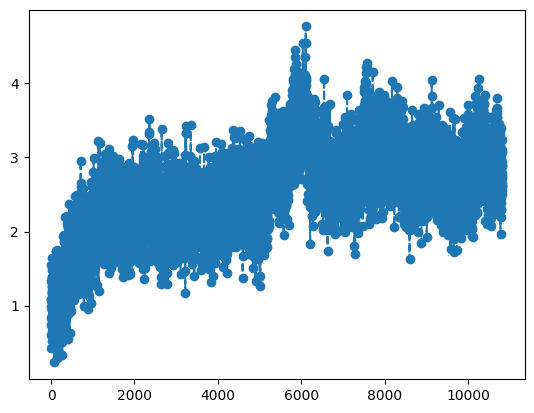

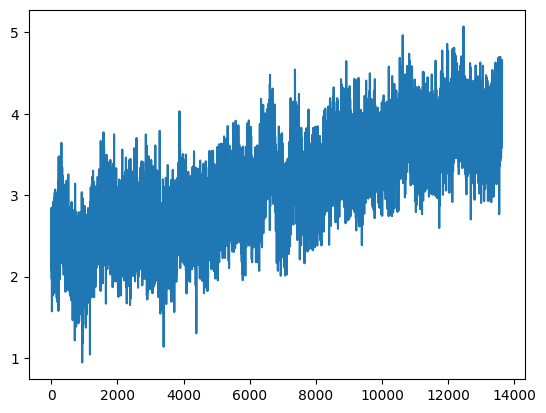

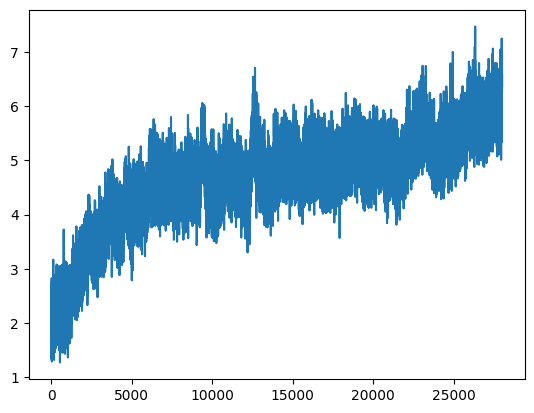

In [22]:
plt.plot(df1[height[1]], "o--")
plt.show()
plt.plot(df2[height[1]])
plt.show()
plt.plot(df3[height[1]])
plt.show()

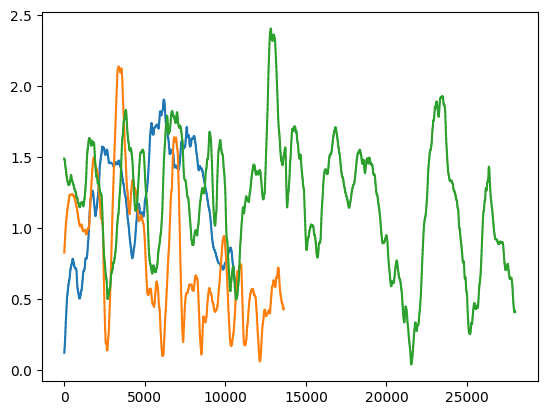

In [23]:
plt.plot(df1[wind[0]])
plt.plot(df2[wind[0]])
plt.plot(df3[wind[0]])

In [101]:
roll = df1[rpy[0]]
pitch = df1[rpy[1]]

e_roll  = np.array([[0,         np.cos(i),  np.sin(i)] for i in roll.to_numpy()])
e_pitch = np.array([[np.cos(i), 0,         -np.sin(i)] for i in pitch.to_numpy()])

n_xy = np.array([0, 0, 1])

cross = np.cross(e_pitch, e_roll)
a = np.array([np.dot(n_xy, i) for i in cross])
b = np.array([(i**2).sum()**0.5 for i in cross])

psi = 1 / np.cos(a / b)


[0.87389535 0.89889365 0.91831286 ... 0.99929093 0.99723172 0.99997264]
86.88506813805041


In [97]:
Fd = g * m * np.tan(psi)

array([ 103.48856074,  107.10511436,  107.5862125 , ...,   94.75362139,
        402.56423879, -251.81616707])

In [100]:
Aproj = 1
cd = 1
rv = np.abs(2 * Fd / (density * Aproj * cd))**0.5

In [103]:
n_xy_neg = [-1, 0, 0]

a = np.array([np.dot(n_xy_neg, i) for i in cross])
b = np.array([(i**2).sum()**0.5 for i in cross])

lambd = 1 / np.cos(a / b)


array([1.45364873, 1.44959129, 1.46715925, ..., 1.00014841, 1.00548161,
       1.03216651])